<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/stationarity_cointegration_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [3]:
data = np.random.rand(100)
df = pd.DataFrame(data, columns=['Value'])

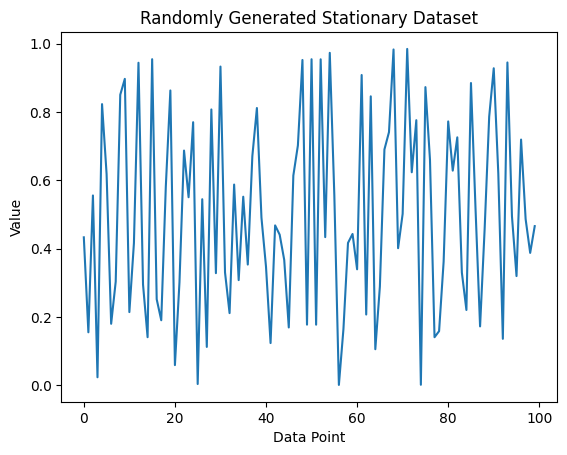

In [4]:
# Create a simple line graph
plt.plot(df['Value'])
plt.title('Randomly Generated Stationary Dataset')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.show()

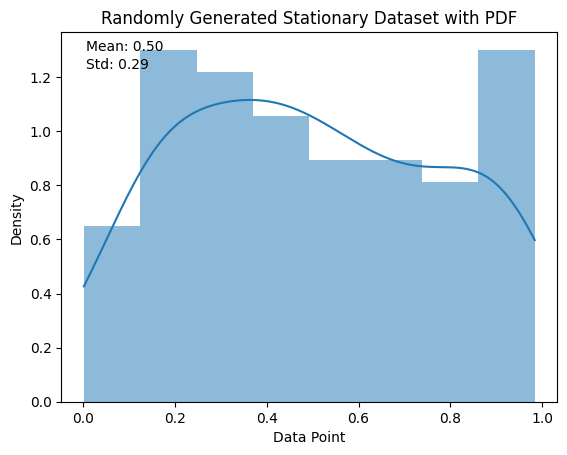

In [5]:
# --- Add text to the profile ---
# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Add text with mean and standard deviation to the plot
plt.text(0.05, 0.95, f'Mean: {mean:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'Std: {std:.2f}', transform=plt.gca().transAxes)

# --- Add histogram with PDF ---
# Create a histogram with PDF using seaborn
sns.histplot(data, kde=True, stat="density", linewidth=0)
plt.title('Randomly Generated Stationary Dataset with PDF')
plt.xlabel('Data Point')
plt.ylabel('Density')

plt.show()

In [6]:
def generate_datapoint(params):
      mu = params[0]  # Accessing the first element of the tuple using indexing
      sigma = params[1] # Accessing the second element of the tuple using indexing
      return np.random.normal(mu, sigma, 1)

## Series A (Stationarity)

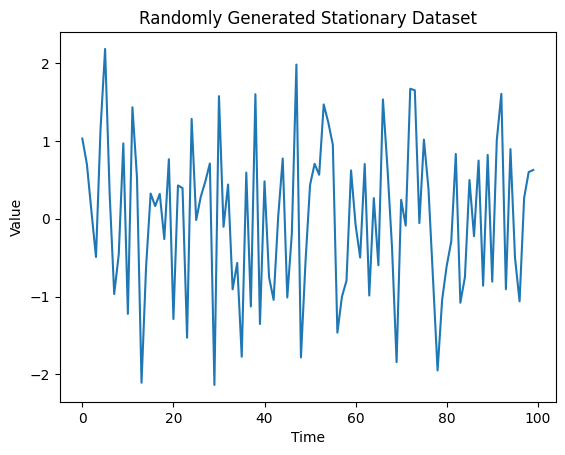

In [16]:
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_datapoint(params)

plt.plot(A)
plt.title('Randomly Generated Stationary Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Series B (Non-Stationarity)

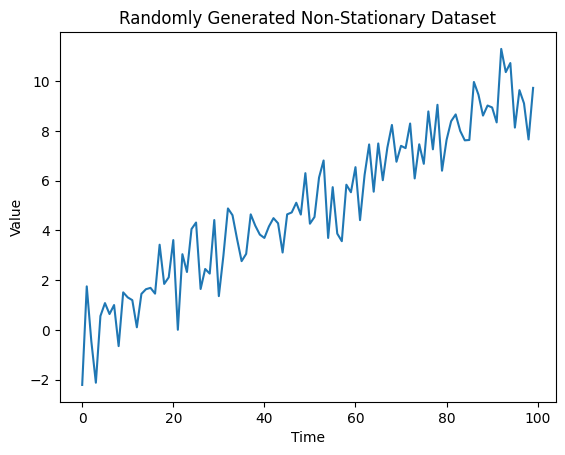

The mean of non-stationary data is worthless!!


In [8]:
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    params = (t * 0.1,1)
    B[t] = generate_datapoint(params)

plt.plot(B)
plt.title('Randomly Generated Non-Stationary Dataset')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

print('The mean of non-stationary data is worthless!!')

### Testing for Stationarity

In [9]:
def check_for_stationarity(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name + ' is likely stationary.')
        #return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name + ' is likely NOT stationary.')
        #return False

In [10]:
check_for_stationarity(A)
check_for_stationarity(B)

p-value = 3.5466338974088697e-13 The series A is likely stationary.
p-value = 0.5774046310158484 The series B is likely NOT stationary.


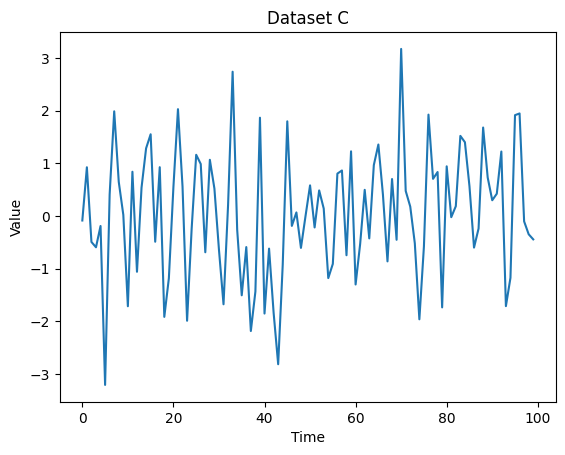

In [11]:
T = 100

C = pd.Series(index=range(T))
C.name = 'C'

for t in range(T):
      params = (np.sin(t), 1)
      C[t] = generate_datapoint(params)

plt.plot(C)
plt.title('Dataset C')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


Dont trust graphs--the above graph is NOT stationary

In [12]:
check_for_stationarity(C)

p-value = 0.10450837339281704 The series C is likely NOT stationary.


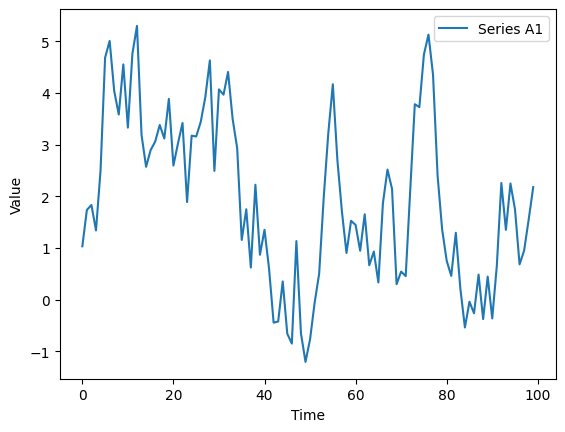

In [17]:
A1 = np.cumsum(A)

plt.plot(A1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A1'])
plt.show()

In [19]:
check_for_stationarity(A1)

p-value = 0.021269781429013524 The series A is likely NOT stationary.


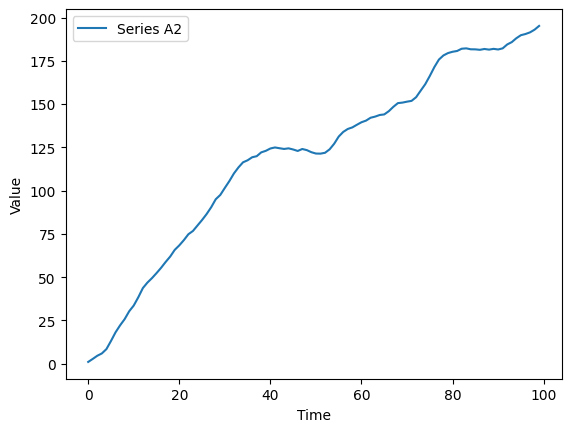

In [18]:
A2 = np.cumsum(A1)

plt.plot(A2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A2'])
plt.show()

In [20]:
check_for_stationarity(A2)

p-value = 0.14783114775499123 The series A is likely NOT stationary.
